<a href="https://colab.research.google.com/github/munira1413/Masar-/blob/main/HW_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Read data from CSV file
data = pd.read_csv('/content/Diabetes_prediction.csv')
data
df = data


In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [30]:
#Explore the data
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
5,2,108.870034,74.338518,25.390851,78.704740,20.008180,0.673117,24.893761,0
6,3,95.665270,54.157100,23.927648,130.989859,29.235840,0.461786,18.669086,1
7,0,108.353474,68.497370,22.611992,109.225691,27.724017,0.474361,44.517575,0
8,2,120.979399,50.617860,23.677139,-11.616854,21.032709,0.105676,42.743013,1
9,2,123.839177,75.067548,23.198216,181.809109,29.271195,0.622292,66.017355,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [32]:
#The column
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')

In [33]:
#Check data types
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Diagnosis                     int64
dtype: object

In [34]:
#Check the null (missing values)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

In [35]:
#Total of each culumn
data.sum()

Pregnancies                  1771.000000
Glucose                     99440.607437
BloodPressure               72179.836635
SkinThickness               23278.316136
Insulin                     84582.678754
BMI                         25433.599654
DiabetesPedigreeFunction      449.382822
Age                         43281.797810
Diagnosis                     306.000000
dtype: float64

In [36]:
#Max value
data.Glucose.max()

161.23893930812437

In [37]:
#Check for duplicate rows
data.duplicated().sum()

0

In [38]:
#Check for outliers (Five point summury)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


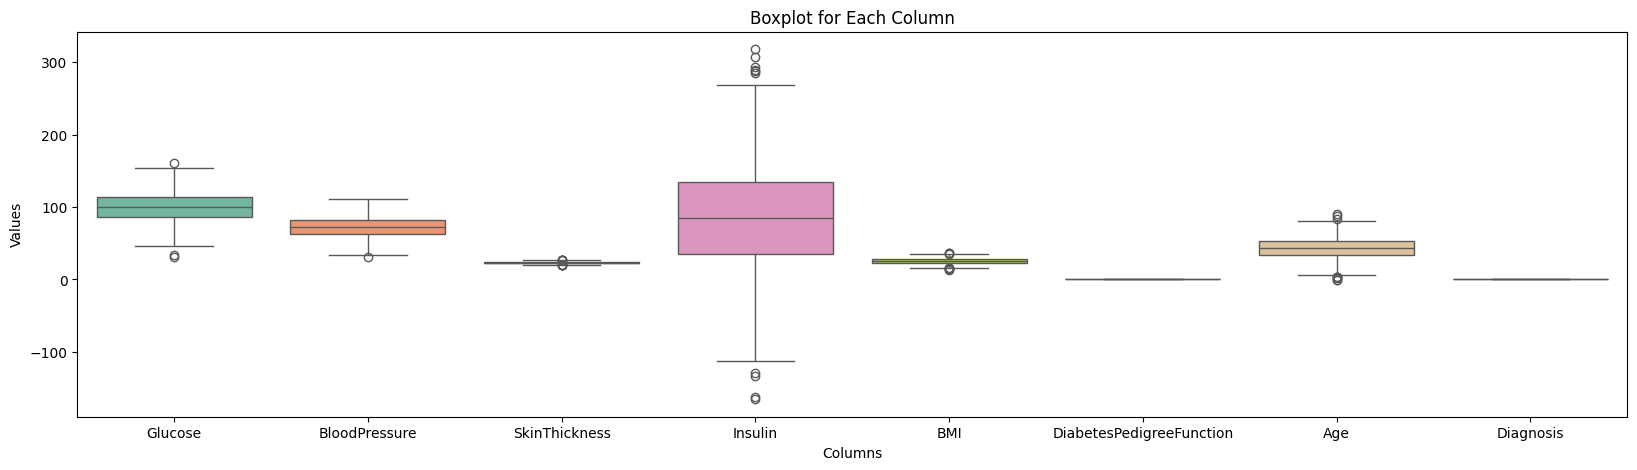

In [39]:
#Set the matplotlib
plt.figure(figsize=(20, 5))
#Create boxplots for each column using seaborn
sns.boxplot(data=data.drop('Pregnancies', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

In [40]:
# Normalization using StandardScaler
dataProcess = data
columnsToNormalize = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler = StandardScaler()
dataProcess[columnsToNormalize] = scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,0.843882,-1.136506,0.902150,0.130996,0.277179,-0.886898,-1.603337,0
1,2,-0.357150,-0.112743,0.140873,0.722517,-0.413036,1.083028,0.112773,0
2,1,-0.580604,-0.642679,0.107438,0.865573,-0.944955,1.137547,0.343479,1
3,2,0.463106,-0.316121,-2.153677,0.322962,-0.331933,-0.801800,-0.036791,0
4,1,1.459784,1.624917,-0.575543,-0.792577,2.050733,0.762580,-0.725127,0
...,...,...,...,...,...,...,...,...,...
995,1,0.208404,-2.242902,1.408077,-0.546623,0.111827,0.032632,-1.616829,0
996,1,-1.989953,-0.583564,1.202458,0.360526,-1.618413,-0.997934,0.078853,1
997,0,-0.094696,-0.580719,-0.969961,0.314770,-0.732178,1.566395,1.083679,1
998,0,-1.678510,-1.172681,1.369699,1.803144,1.731273,-0.333807,0.252254,0


In [41]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
dataProcess[columnsToNormalize] = min_max_scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,0.652740,0.315287,0.658051,0.537659,0.566704,0.246771,0.230251,0
1,2,0.473865,0.494364,0.539717,0.629306,0.454928,0.807760,0.501259,0
2,1,0.440584,0.401667,0.534520,0.651471,0.368788,0.823286,0.537693,1
3,2,0.596029,0.458789,0.183049,0.567402,0.468062,0.271005,0.477640,0
4,1,0.744470,0.798316,0.428356,0.394566,0.853918,0.716504,0.368938,0
...,...,...,...,...,...,...,...,...,...
995,1,0.558095,0.121755,0.736693,0.432673,0.539926,0.508632,0.228120,0
996,1,0.230683,0.412008,0.704731,0.573221,0.259726,0.215150,0.495903,1
997,0,0.512953,0.412505,0.367047,0.566132,0.403246,0.945412,0.654585,1
998,0,0.277068,0.308959,0.730727,0.796733,0.802184,0.404278,0.523286,0


In [42]:
dataProcess.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,0.652740,0.315287,0.658051,0.537659,0.566704,0.246771,0.230251,0
1,2,0.473865,0.494364,0.539717,0.629306,0.454928,0.807760,0.501259,0
2,1,0.440584,0.401667,0.534520,0.651471,0.368788,0.823286,0.537693,1
3,2,0.596029,0.458789,0.183049,0.567402,0.468062,0.271005,0.477640,0
4,1,0.744470,0.798316,0.428356,0.394566,0.853918,0.716504,0.368938,0


In [43]:
#Create a sample dataset
sampleData = {'Glucose': [15.26, 13.84, 16.63, 14.69, 12.30],
        'Perimeter': [14.84, 13.94, 15.46, 14.49, 13.34]}

sampleDf = pd.DataFrame(sampleData)

#Original DataFrame
print("Original DataFrame:")
print(sampleDf)

#Compute Compactness: C = 4(PI)A / P^2 Where C= compactness, A= area, P= perimeter, PI= 3.14159
sampleDf['Compactness'] = (4 * 3.14159 * sampleDf['Glucose']) / (sampleDf['Perimeter'] ** 2)

# Display the final DataFrame with Compactness
print("\nDataFrame with Compactness:")
print(sampleDf)

Original DataFrame:
   Glucose  Perimeter
0    15.26      14.84
1    13.84      13.94
2    16.63      15.46
3    14.69      14.49
4    12.30      13.34

DataFrame with Compactness:
   Glucose  Perimeter  Compactness
0    15.26      14.84     0.870756
1    13.84      13.94     0.894994
2    16.63      15.46     0.874345
3    14.69      14.49     0.879214
4    12.30      13.34     0.868566


In [44]:
#Drop the [Pregnancies] column
dataDiagram = data.drop('Pregnancies', axis=1)

In [45]:
dataDiagram.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,0.652740,0.315287,0.658051,0.537659,0.566704,0.246771,0.230251,0
1,0.473865,0.494364,0.539717,0.629306,0.454928,0.807760,0.501259,0
2,0.440584,0.401667,0.534520,0.651471,0.368788,0.823286,0.537693,1
3,0.596029,0.458789,0.183049,0.567402,0.468062,0.271005,0.477640,0
4,0.744470,0.798316,0.428356,0.394566,0.853918,0.716504,0.368938,0


Text(0.5, 1.02, 'Scatterplot of seeds features by seed type')

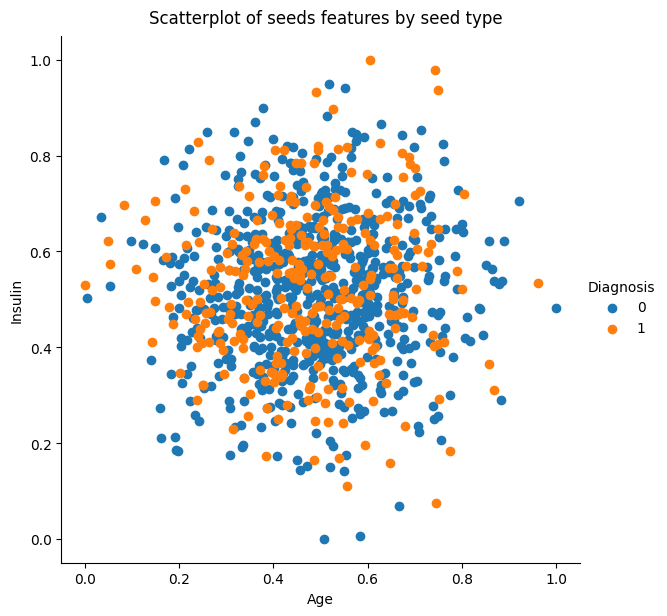

In [46]:
sns.FacetGrid(dataDiagram, hue ="Diagnosis", height = 6).map(plt.scatter, 'Age' ,'Insulin').add_legend()
plt.suptitle("Scatterplot of seeds features by seed type", y=1.02)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

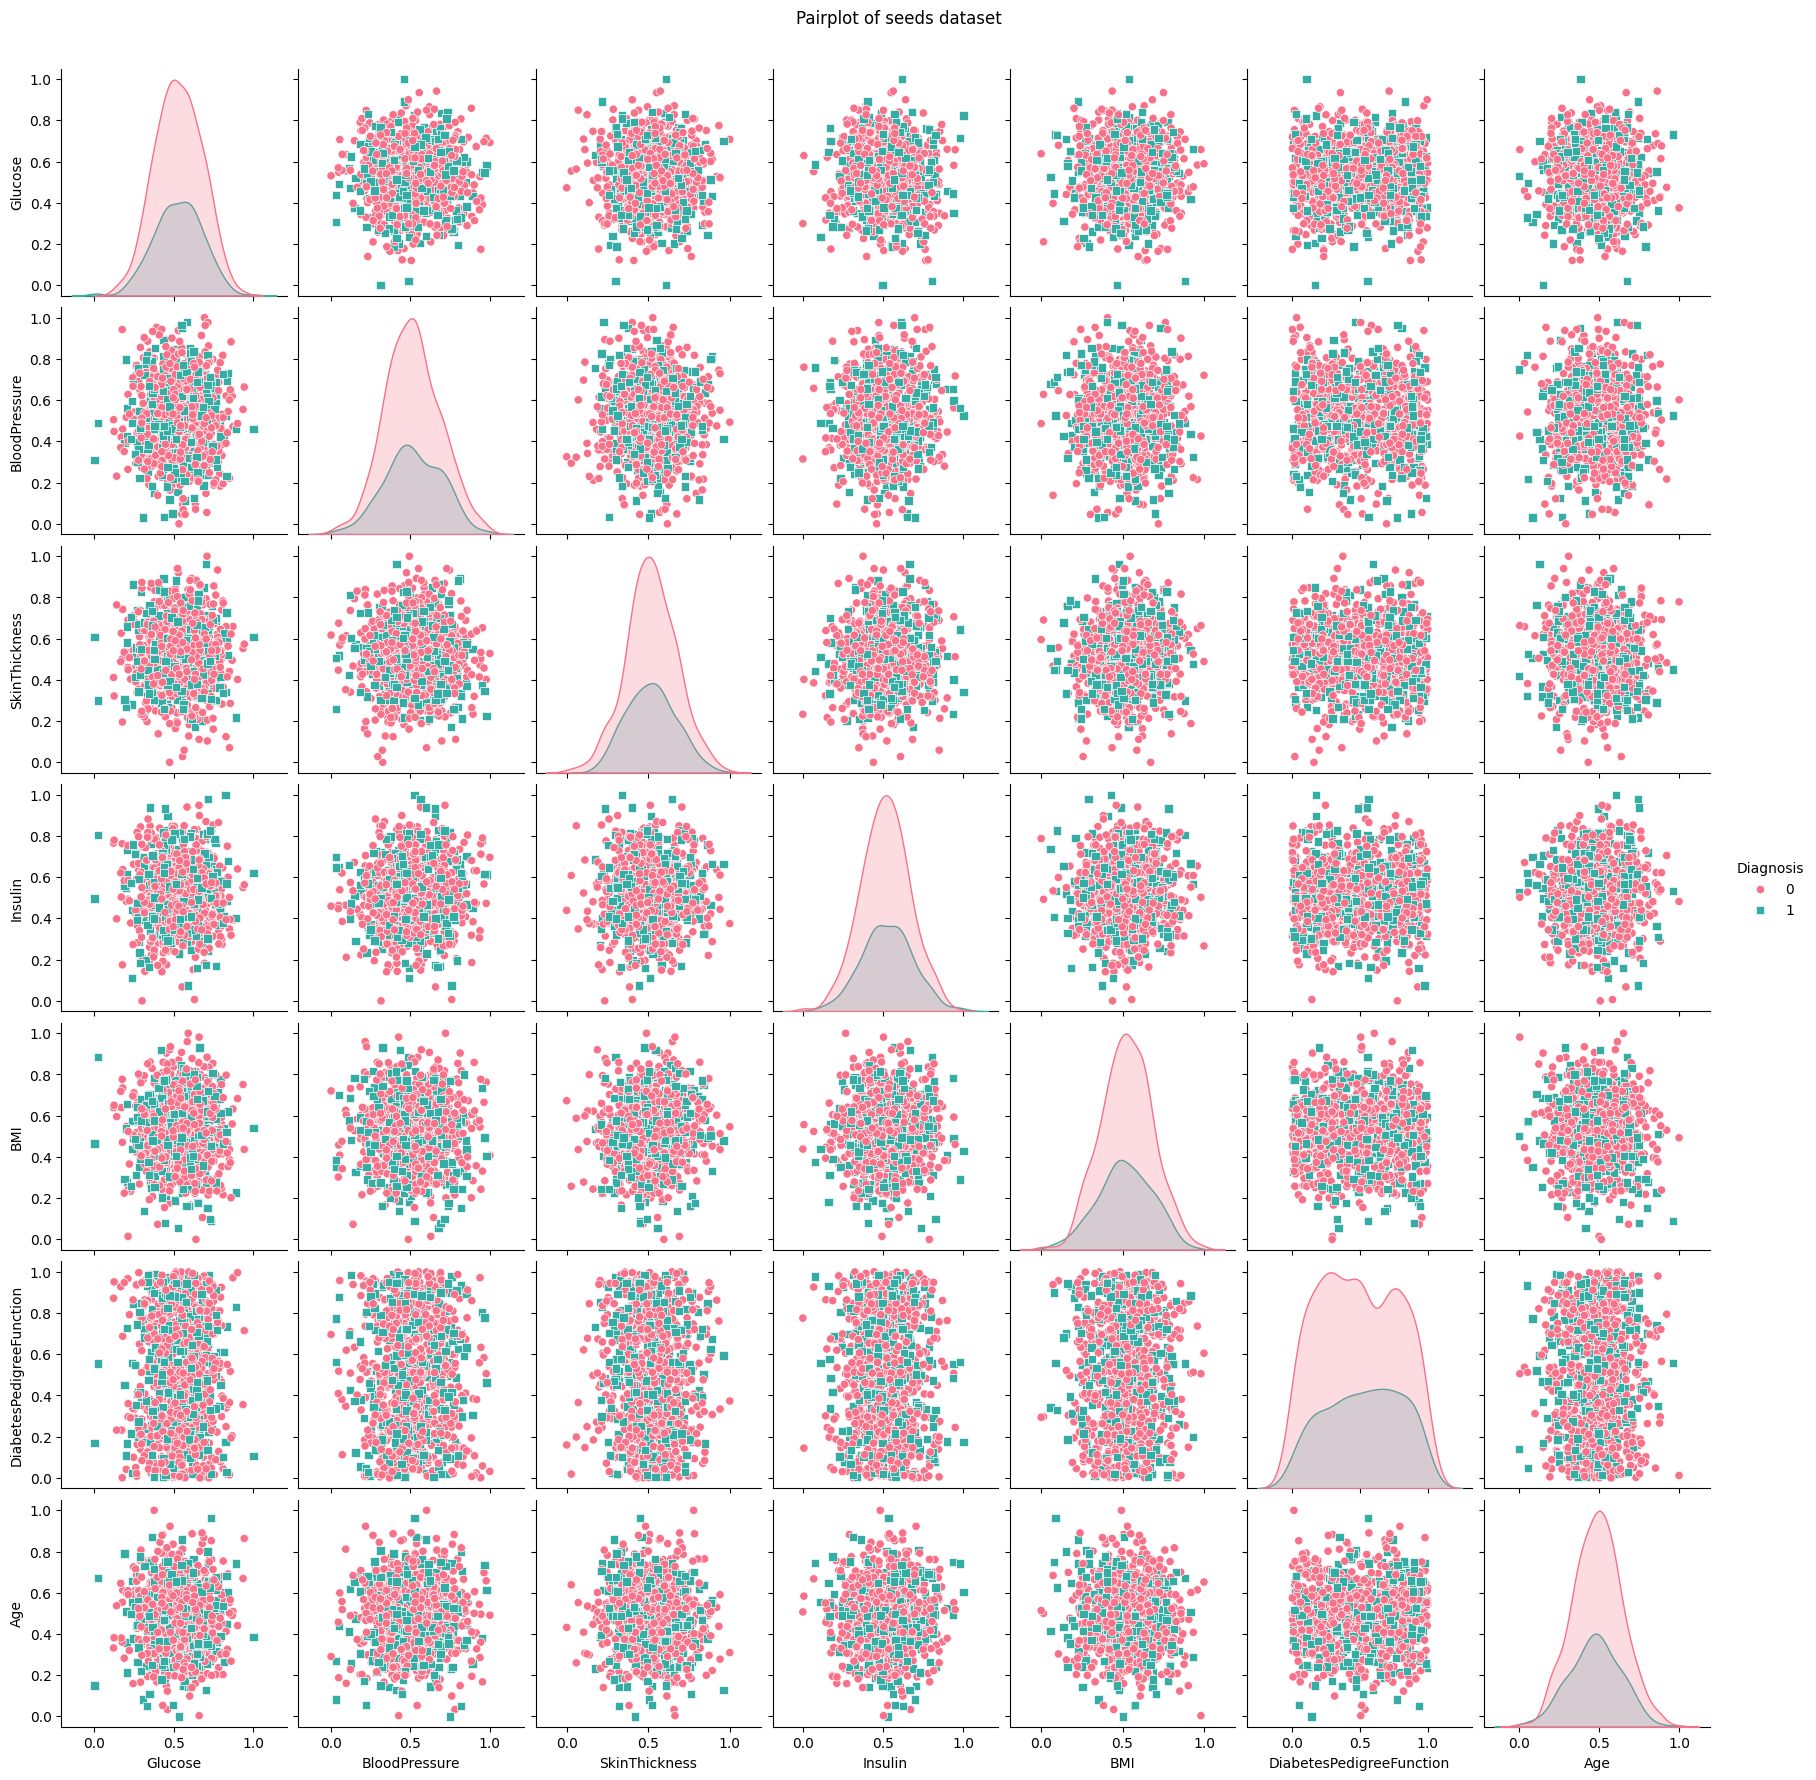

In [47]:
# Pairplot: Scatterplot Matrix
sns.pairplot(dataDiagram, hue="Diagnosis", palette="husl", markers=["o", "s", "D"])
plt.suptitle("Pairplot of seeds dataset", y=1.02)
plt.show()

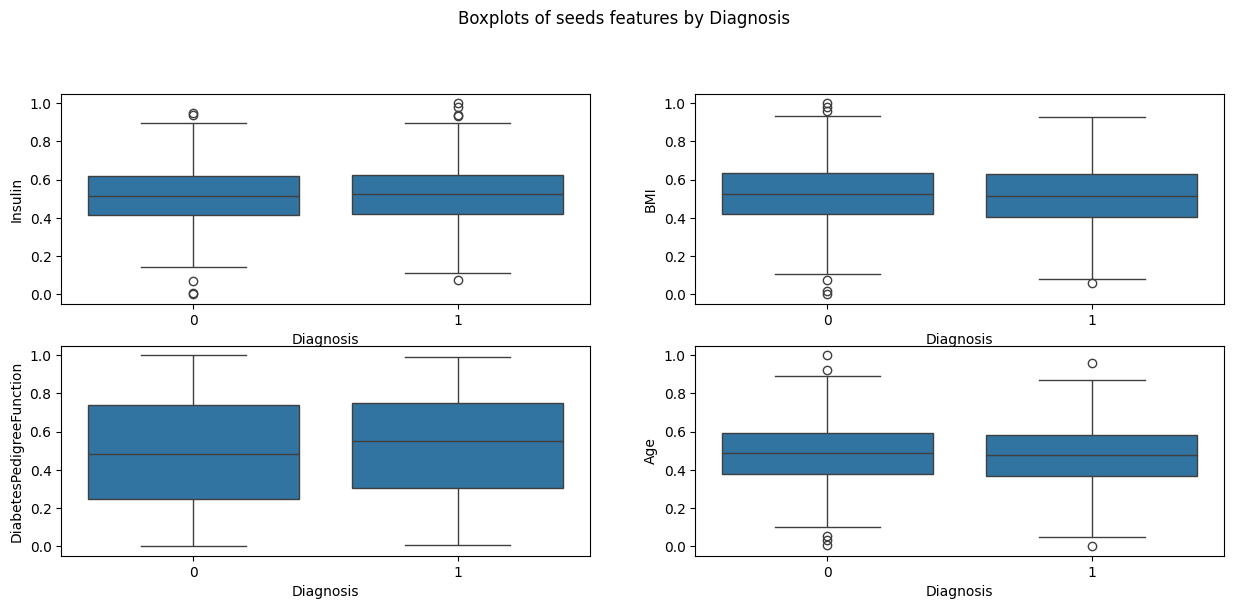

In [48]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="Diagnosis", y="Insulin", data=dataDiagram)
plt.subplot(2, 2, 2)
sns.boxplot(x="Diagnosis", y="BMI", data=dataDiagram)
plt.subplot(2, 2, 3)
sns.boxplot(x="Diagnosis", y="DiabetesPedigreeFunction", data=dataDiagram)
plt.subplot(2, 2, 4)
sns.boxplot(x="Diagnosis", y="Age", data=dataDiagram)
plt.suptitle("Boxplots of seeds features by Diagnosis", y=1.02)
plt.show()

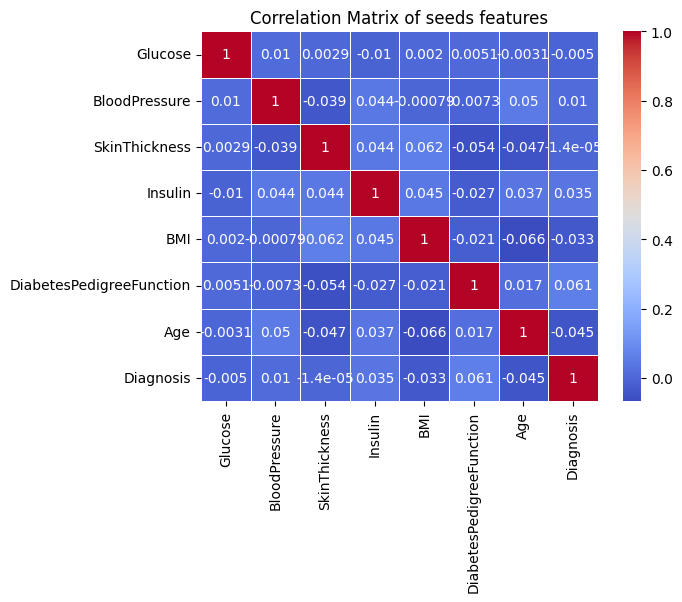

In [49]:
correlation_matrix = dataDiagram.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of seeds features")
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Assuming 'seedType' is the label and the rest are features
X = df[['SkinThickness','DiabetesPedigreeFunction']]
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# Get the coefficients
coefficients = model.coef_[0]

# Print the coefficients for each feature
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

Accuracy: 0.6825
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       273
           1       0.00      0.00      0.00       127

    accuracy                           0.68       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.47      0.68      0.55       400

SkinThickness: -0.14753424708615828
DiabetesPedigreeFunction: 0.14683361506707784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


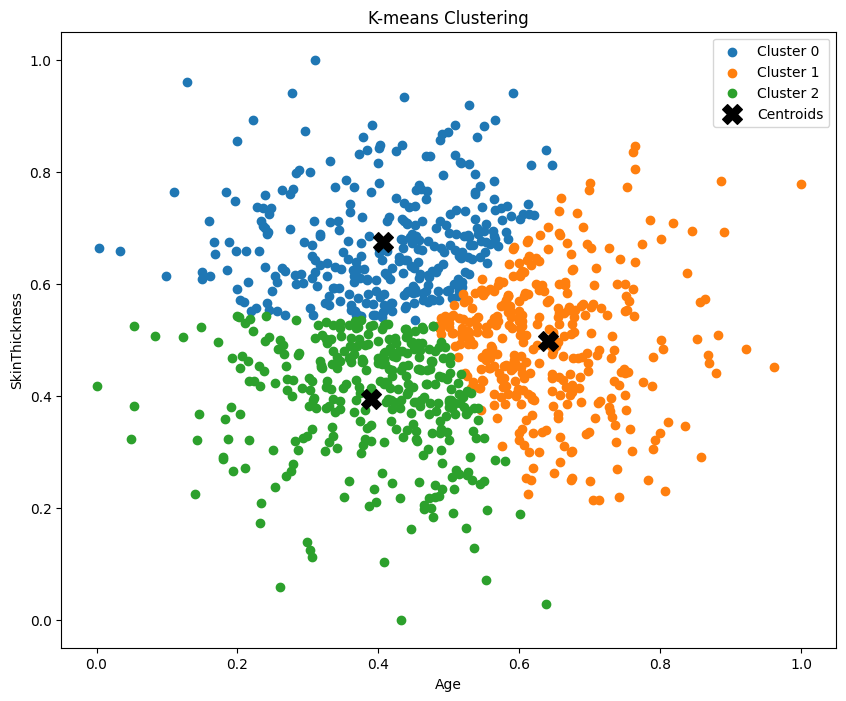

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features
X = df[['Age', 'SkinThickness']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
n_clusters = 3  # Adjust as needed

# Create K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
labels = kmeans.labels_
df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 8))

for cluster in range(n_clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Age'], cluster_points['SkinThickness'], label=f'Cluster {cluster}')

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('SkinThickness')
plt.legend()
plt.show()

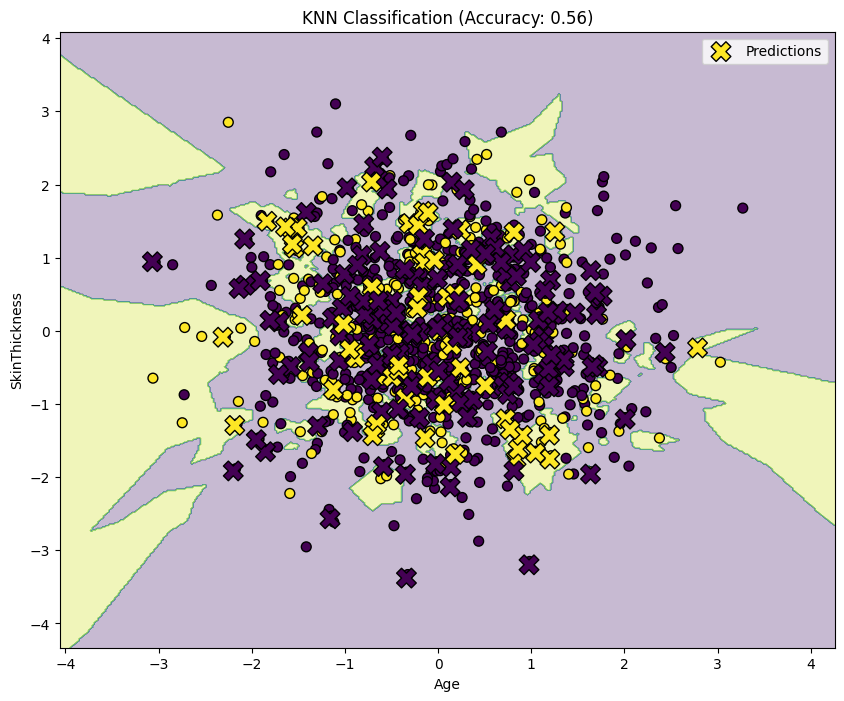

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Extract features and target variable
X = df[['Age', 'SkinThickness']]
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the number of neighbors (K)
n_neighbors = 3

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the decision boundaries
plt.figure(figsize=(10, 8))

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Plot data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, marker='X', s=200, cmap='viridis', edgecolor='k', label='Predictions')

plt.title(f'KNN Classification (Accuracy: {accuracy:.2f})')
plt.xlabel('Age')
plt.ylabel('SkinThickness')
plt.legend()
plt.show()

